In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000887919"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000887919
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,PREMIER FINANCIAL BANCORP INC
Ticker,PFBI


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,54.0,1.503444e+01,2.374392e+00,10.14,1.342250e+01,1.531500e+01,17.13,18.36
interest income,55.0,1.197135e+07,2.970418e+06,4723000.00,9.117000e+06,1.278900e+07,13735500.00,19064000.00
net income,55.0,2.621764e+06,1.189495e+06,-200000.00,1.788000e+06,2.504000e+06,3196500.00,6176000.00
net interest income,55.0,1.001978e+07,3.474184e+06,3209000.00,6.503500e+06,1.101700e+07,12361500.00,16835000.00
provision for loan losses,55.0,3.190909e+05,5.200842e+05,-925000.00,-6.500000e+03,3.090000e+05,570500.00,1820000.00


# Plots

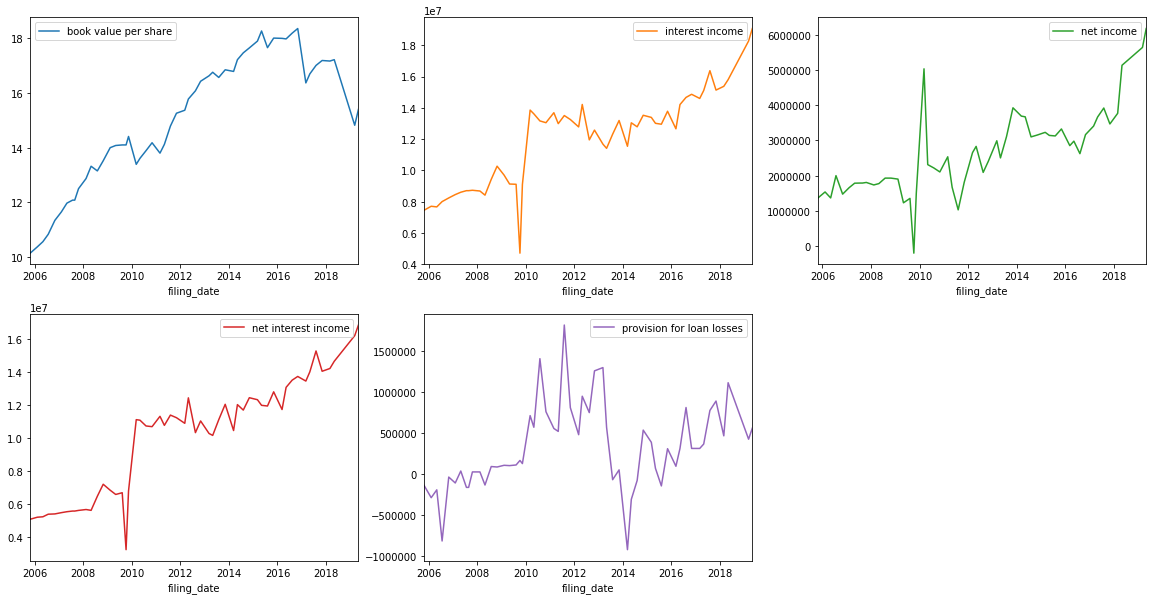

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                
0000887919 book value per share       2018Q2 to 2018Q3: 2 periods    missing   
           interest income                                 2009Q2  duplicate   
           interest income            2018Q2 to 2018Q3: 2 periods    missing   
           net income                                      2009Q2  duplicate   
           net income                 2018Q2 to 2018Q3: 2 periods    missing   
           net interest income                             2009Q2  duplicate   
           net interest income        2018Q2 to 2018Q3: 2 periods    missing   
           provision for loan losses                       2009Q2  duplicate   
           provision for loan losses  2018Q2 to 2018Q3: 2 periods    missing   
           total revenue                                     None      empty   

                                                 message  
cik        item                                           
0000887919 book value per share           Missing period  
           interest income              Duplicate period  
           interest income                Missing period  
           net income                   Duplicate period  
           net income                     Missing period  
           net interest income          Duplicate period  
           net interest income            Missing period  
           provision for loan losses    Duplicate period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()